<a href="https://colab.research.google.com/github/sysphcd/PythonProgrammingforData/blob/main/12_IBMWatsonToneAnalyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-project - creating a dataframe from analysed text data

For this project you are going to use the IBM Watson Tone Analyser API.  You will send text data to it, use security information stored in a config file to keep it secret, receive the results in JSON format, investigate the structure of the results and build a dataframe from them.

Then you will use the results to create a visualisation of tone and to report an overall set of statistics from the data.

---

## Step 1 - sign up for IBM Watson services to use the Tone Analyser

1.  Sign up for [IBM Watson](https://cloud.ibm.com/registration?cm_mmc=dw-_-cognitive-_-topcoder-_-communityEducational1)
2.  Click 'Try on Cloud at no cost'  
3.  Select the London region  (costs reduced and performance improved when you use the nearest servers)  
4.  Create an IBM Cloud account (enter email and accept terms)  
5.  Follow the instructions to create the account  
6.  Provision the services  
7.  Then go to IBM Watson Studio  
8.  Select Tone Analyzer under the Your Services heading  
9.  You will be shown the **url** for the Tone Analyser API and an **API key** which is needed for using the API.

# Step 2 - add security to your worksheet to keep your apikey and url hidden

You can do this by using environment variables, which are stored in the operating system for this worksheet.

We will use a simplified system for storing the sensitive data so that it isn't visible in the worksheet:

1.  Ask for the api key to be input and store it in an environment variable called apikey

2.  Ask for the url to be input and store it in an environment variable

3.  Run the cell, type in the api key, then the url.  Once tis has been done.  Remove the output part of the cell.

In [ ]:
import os

# add the code to ask for the URL, then run this cell and when it has completed, remove the output (note: you will need to do this again if you return to the worksheet)
os.environ['APIKEY'] = input("Enter API key: ")
os.environ['URL'] = input("Enter URL: ")


KeyboardInterrupt: ignored

# Install the ibm_watson libraries so that you can use their functions

In [ ]:
# install the ibm_watson libraries

!pip install ibm_watson

---

## Test to make sure it works

1.  Open this file, which has some text for you to test with: https://drive.google.com/file/d/1m65cPQGYQd1mwvEmfZw69-GMUBdo43k0/view?usp=sharing.  You will be able to copy and paste the text into here as needed.

2.  Get the environment variable for each of the two pieces of security information so that these do not need to be included in your notebook (have the keys available for copying and pasting).  To do this:

  ``` apikey = os.environ.get('APIKEY') ```

3.  Run the code below,which will create a ToneAnalyzer with the credentials from your environment variables, then paste the text from the **text-for-analysis.txt** file

4.  Decide what the data looks like and how this might be represented in a pandas dataframe

In [ ]:
from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
import os
import json

# get credentials from the environment variables you set
def get_secret(key):
    # add code here to get the keys from the environment variable and return the requested key
    # if there is an error print an error message and return None
    return os.environ.get(key)


    
def get_text_for_analysis():
    # add code here to input the text from the text-for-analysis.txt file and return the text it reads as one string
    # if there is an error, return None
    # return 'Team, I know that times are tough! Product sales have been disappointing for the past three quarters. We have a competitive product, but we need to do a better job of selling it!'
    return 'But I feel peaceful. Your success in the ring this morning was, to a small degree, my success. Your future is assured. You will live, secure and safe, Wilbur. Nothing can harm you now. These autumn days will shorten and grow cold. The leaves will shake loose from the trees and fall. Christmas will come, and the snows of winter. You will live to enjoy the beauty of the frozen world, for you mean a great deal to Zuckerman and he will not harm you, ever. Winter will pass, the days will lengthen, the ice will melt in the pasture pond. The song sparrow will return and sing, the frogs will awake, the warm wind will blow again. All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days.'
     
    
# create a ToneAnalyzerV3 object, version 2017-09-21 using api key and url from config
authenticator = IAMAuthenticator(apikey=get_secret('APIKEY'))
tone_analyzer = ToneAnalyzerV3(
    version='2017-09-21',
    authenticator=authenticator
)
tone_analyzer.set_service_url(get_secret('URL'))

# get the text for analysis from the file
text = get_text_for_analysis()
if text:
    tone_analysis = tone_analyzer.tone(
        {'text': text},
        content_type='application/json'
    ).get_result()    
    print(tone_analysis)
else:
    print("No data")

ModuleNotFoundError: ignored

# WORKING WITH THE OUTPUT OF TEXT ANALYSIS

### Watson Tone Analyser API Output
---

This is the output that the given text will produce. You will need to assign this output to a variable called **tone_analysis** in the function you are going to write below. 

```
{'document_tone': {'tones': [{'score': 0.582191, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.829888, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, 'sentences_tone': [{'sentence_id': 0, 'text': 'Team, I know that times are tough!', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 1, 'text': 'Product sales have been disappointing for the past three quarters.', 'tones': [{'score': 0.817406, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 2, 'text': 'We have a competitive product, but we need to do a better job of selling it!', 'tones': [{'score': 0.506763, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}]}

```



### Use the code cell below to inspect the data
---
You might find it useful to use

```object.keys()```

In [34]:
tone_analysis = {'document_tone': {'tones': [{'score': 0.582191, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.829888, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, 'sentences_tone': [{'sentence_id': 0, 'text': 'Team, I know that times are tough!', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 1, 'text': 'Product sales have been disappointing for the past three quarters.', 'tones': [{'score': 0.817406, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}, {'sentence_id': 2, 'text': 'We have a competitive product, but we need to do a better job of selling it!', 'tones': [{'score': 0.506763, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]}]}
print(type(tone_analysis))
print(tone_analysis.keys())
# print(tone_analysis.items())
# print("# -------------tone_analysis --------------------------")  
# for k, v in tone_analysis.items():
#   print("key : ", key, " type: ", type(key))
#   print("value : ", value, " type: ", type(value))

print("# --------------document_tone-------------------------")  
# print("how many items in document tone : ", len(tone_analysis['document_tone']))
for dkey,dvalue in tone_analysis['document_tone'].items():
  print("key : ", dkey, " type: ", type(dkey))
  # print("value : ", dvalue, " type: ", type(dvalue))
  for each_value in dvalue :
    print(each_value)


print("# --------------sentences_tone-------------------------")  
# print("how many items in sentences tone : ", len(tone_analysis['sentences_tone']))
for skey in tone_analysis['sentences_tone']:
  # print("key : ", skey, " type: ", type(skey))
  for eachk, eachv in skey.items():
    print(eachk, ":" , eachv)
    if eachk == "tones" :
      print("numbers of tones : ", len(eachv))
  print("--------------")



<class 'dict'>
dict_keys(['document_tone', 'sentences_tone'])
# --------------document_tone-------------------------
key :  tones  type:  <class 'str'>
{'score': 0.582191, 'tone_id': 'sadness', 'tone_name': 'Sadness'}
{'score': 0.829888, 'tone_id': 'analytical', 'tone_name': 'Analytical'}
# --------------sentences_tone-------------------------
sentence_id : 0
text : Team, I know that times are tough!
tones : [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]
numbers of tones :  1
--------------
sentence_id : 1
text : Product sales have been disappointing for the past three quarters.
tones : [{'score': 0.817406, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.687768, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]
numbers of tones :  2
--------------
sentence_id : 2
text : We have a competitive product, but we need to do a better job of selling it!
tones : [{'score': 0.506763, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]
numbers of tones : 

### Create (on paper) an idea of how this data might be organised into a data table

1.  How many bits of information are there about the document as a whole?
2.  How many bits of information are there about each sentence?
3.  If all tone analysis records were included in the dataframe, how many rows would there be?
4.  What information would be included in each row?

1. How many bits of information are there about the document as a whole?


> ANS : There are 2 bits of information :

> * document_tone : contains 'score', 'tone_id','tone_name'

> *   sentences_tone: contains sentence_id', 'text', 'tones ('score','tone_id','tone_name' )


2. How many bits of information are there about each sentence?

> ANS :

> *  sentence_id

> *  text

> *  tones ('score','tone_id','tone_name' )


3. If all tone analysis records were included in the dataframe, how many rows would there be?

> ANS : total should be 4 rows in the dataframe

4. What information would be included in each row?
> ANS :
> sentence_id : unique id

> text : the sentence

> tones : score,  tone_id ,tone_name







### Create a dataframe and start to populate with the data

You can create a **dataframe** from this data either by converting it manually into a table OR by using the pandas function pd.json_normalise(data).  

**Manually**:

One way to do this would be to create a list of dictionary records, with each record formed from the data from each row in the original 'sentences_tone' data.  You will need to loop through the rows in the 'sentences_tone' list, nesting a loop through the 'tones' list for each sentence.  For each, copy across the columns you feel should be included.

_Hint:_  
```
 for row in sentence_data:
        for col in row['tones']:
            new_row = {'sentence_id':row['sentence_id'], 'text':row['text'], 'tone_score':col['score'], 'tone_id':col['tone_id'],'tone_name':col['tone_name']}
```
**Using pandas**:

An alternative way to do this would be to create a pandas dataframe from the sentences_tone data list (using `pd.json_normalise(data)`)

In [35]:
import pandas as pd
import numpy as np

# convert json data to a dataframe with one row for each tone for each sentence
def convert_to_tones_table(data):
    # return the data normalized into a dataframe (pd.json_normalise(data))
    # the dataframe should have the columns: sentence_id, text, score, tone_id, tone_name
    #df = pd.DataFrame(data)
    #print(df)
    df = pd.json_normalize(data) 
    
    return df



In [6]:

document_tone_df = convert_to_tones_table(tone_analysis['document_tone']['tones'])
document_tone_df.head()

,score,tone_id,tone_name
0,0.582191,sadness,Sadness
1,0.829888,analytical,Analytical


In [36]:
sentences_tone_df = convert_to_tones_table(tone_analysis['sentences_tone'])
sentences_tone_df.head()

,sentence_id,text,tones
0,0,"Team, I know that times are tough!","[{'score': 0.801827, 'tone_id': 'analytical', ..."
1,1,Product sales have been disappointing for the ...,"[{'score': 0.817406, 'tone_id': 'sadness', 'to..."
2,2,"We have a competitive product, but we need to ...","[{'score': 0.506763, 'tone_id': 'analytical', ..."


In [37]:
sentences_tone_df_exploded = sentences_tone_df.explode('tones',ignore_index=True)
sentences_tone_df_exploded

,sentence_id,text,tones
0,0,"Team, I know that times are tough!","{'score': 0.801827, 'tone_id': 'analytical', '..."
1,1,Product sales have been disappointing for the ...,"{'score': 0.817406, 'tone_id': 'sadness', 'ton..."
2,1,Product sales have been disappointing for the ...,"{'score': 0.687768, 'tone_id': 'analytical', '..."
3,2,"We have a competitive product, but we need to ...","{'score': 0.506763, 'tone_id': 'analytical', '..."


In [38]:
# move the score from the tones column to its own column
# lambda x: is a way of defining a function in a set of brackets
# after the : is how to get the value of what you are trying to look for
sentences_tone_df_exploded['score'] = sentences_tone_df_exploded['tones'].apply(lambda x: x['score'])
sentences_tone_df_exploded['tone_id'] = sentences_tone_df_exploded['tones'].apply(lambda x: x['tone_id'])
sentences_tone_df_exploded['tone_name'] = sentences_tone_df_exploded['tones'].apply(lambda x: x['tone_name'])
final_df = sentences_tone_df_exploded.drop('tones',axis=1)
final_df
# display(sentences_tone_df_exploded['score'])
# display(sentences_tone_df_exploded['tone_id'])
# display(sentences_tone_df_exploded['tone_name'])


,sentence_id,text,score,tone_id,tone_name
0,0,"Team, I know that times are tough!",0.801827,analytical,Analytical
1,1,Product sales have been disappointing for the ...,0.817406,sadness,Sadness
2,1,Product sales have been disappointing for the ...,0.687768,analytical,Analytical
3,2,"We have a competitive product, but we need to ...",0.506763,analytical,Analytical


In [10]:

# final_df = pd.concat([sentences_tone_df_exploded.drop(['tones'],axis=1),sentences_tone_df_exploded['tones'].apply(pd.Series)], axis=1)
# #final_df = sentences_tone_df_exploded.drop(['tones'],axis=1)
# final_df.head()



,sentence_id,text,score,tone_id,tone_name
0,0,"Team, I know that times are tough!",0.801827,analytical,Analytical
1,1,Product sales have been disappointing for the ...,0.817406,sadness,Sadness
2,1,Product sales have been disappointing for the ...,0.687768,analytical,Analytical
3,2,"We have a competitive product, but we need to ...",0.506763,analytical,Analytical


### Summarise the sentence data
*  Which sentence is the most analytical?
*  which sentence is the least analytical?
*  what is the average analytical tone score for the sentences?
*  what do the analytical scores look like in a bar chart?

In [39]:
#Which sentence is the most analytical?
data = final_df[['text','score','tone_id']][(final_df.tone_name == 'Analytical')]
display(data.loc[data['score'] == data['score'].max()])


,text,score,tone_id
0,"Team, I know that times are tough!",0.801827,analytical


In [40]:
# which sentence is the least analytical?
data = final_df[['text','score','tone_id']][(final_df.tone_name == 'Analytical')]
display(data.loc[data['score'] == data['score'].min()])

display(data.loc[data['score'] == data['score'].min(), 'text'])

,text,score,tone_id
3,"We have a competitive product, but we need to ...",0.506763,analytical


3    We have a competitive product, but we need to ...
Name: text, dtype: object

In [41]:
# what is the average analytical tone score for the sentences?
data = final_df[['sentence_id','text','score','tone_id']][(final_df.tone_name == 'Analytical')]
display(data[['score']].mean())
# grouped_df = data.groupby(['sentence_id', 'text'], as_index=False) #Group by "Name" column.
# final_data = grouped_df['score'].mean() #Compute means.
# # final_data = data.groupby(['text'])['score'].mean()
# display(final_data)

score    0.665453
dtype: float64

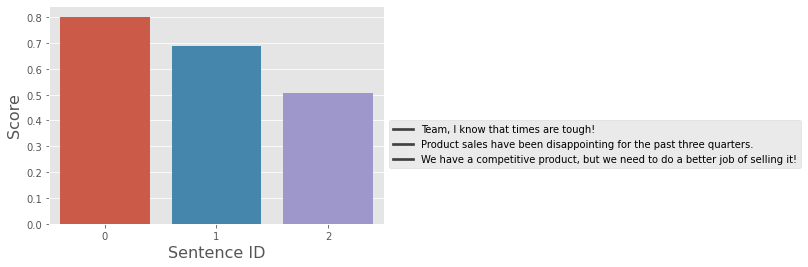

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
# what do the analytical scores look like in a bar chart?
plt.style.use('ggplot')
labels = final_data['sentence_id']
labels_legend = final_data['text']
chart = sns.barplot(x=labels, y=final_data.score)
chart.set_xlabel('Sentence ID', size=16)
chart.set_ylabel('Score', size=16)
chart.legend(labels_legend, loc='best', bbox_to_anchor=(1.0, 0., 0.5, 0.5))

plt.show()


### Challenging:  Report the tone data for the whole document
---

Play with the data, create a dataframe for the document_tone, tones data

 ```pd.json_normalize(document_tone)```  

Display the document score for each of the tones in the analysis

In [15]:
display(tone_analysis['document_tone']['tones'])

document_tone_df = convert_to_tones_table(tone_analysis['document_tone']['tones'])
document_tone_df.head()

[{'score': 0.582191, 'tone_id': 'sadness', 'tone_name': 'Sadness'},
 {'score': 0.829888, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]

,score,tone_id,tone_name
0,0.582191,sadness,Sadness
1,0.829888,analytical,Analytical


### Change the text in the text file and analyse the new text.
---

Here is some alternative, happier text.  Replace the text in the text-for-analysis.txt file with the text below.  Then run the notebook cells again to see the results.

But I feel peaceful. Your success in the ring this morning was, to a small degree, my success. Your future is assured. You will live, secure and safe, Wilbur. Nothing can harm you now. These autumn days will shorten and grow cold. The leaves will shake loose from the trees and fall. Christmas will come, and the snows of winter. You will live to enjoy the beauty of the frozen world, for you mean a great deal to Zuckerman and he will not harm you, ever. Winter will pass, the days will lengthen, the ice will melt in the pasture pond. The song sparrow will return and sing, the frogs will awake, the warm wind will blow again. All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days.

### The result of this analysis is below:

```
{'document_tone': {'tones': [{'score': 0.525587, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, {'score': 0.670614, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.802229, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, 'sentences_tone': [{'sentence_id': 0, 'text': 'But I feel peaceful.', 'tones': [{'score': 0.511185, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}, {'sentence_id': 1, 'text': 'Your success in the ring this morning was, to a small degree, my success.', 'tones': [{'score': 0.919911, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 2, 'text': 'Your future is assured.', 'tones': [{'score': 0.97759, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, {'sentence_id': 3, 'text': 'You will live, secure and safe, Wilbur.', 'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, {'score': 0.92125, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, {'sentence_id': 4, 'text': 'Nothing can harm you now.', 'tones': []}, {'sentence_id': 5, 'text': 'These autumn days will shorten and grow cold.', 'tones': []}, {'sentence_id': 6, 'text': 'The leaves will shake loose from the trees and fall.', 'tones': [{'score': 0.621679, 'tone_id': 'fear', 'tone_name': 'Fear'}]}, {'sentence_id': 7, 'text': 'Christmas will come, and the snows of winter.', 'tones': [{'score': 0.614764, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 8, 'text': 'You will live to enjoy the beauty of the frozen world, for you mean a great deal to Zuckerman and he will not harm you, ever.', 'tones': [{'score': 0.930779, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 9, 'text': 'Winter will pass, the days will lengthen, the ice will melt in the pasture pond.', 'tones': [{'score': 0.654012, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}, {'sentence_id': 10, 'text': 'The song sparrow will return and sing, the frogs will awake, the warm wind will blow again.', 'tones': [{'score': 0.600542, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, {'sentence_id': 11, 'text': 'All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days.', 'tones': [{'score': 0.939404, 'tone_id': 'joy', 'tone_name': 'Joy'}, {'score': 0.660207, 'tone_id': 'confident', 'tone_name': 'Confident'}]}]}
```

In [50]:
tone_analysis2 = {'document_tone': 
                  {'tones': [{'score': 0.525587, 'tone_id': 'sadness', 'tone_name': 'Sadness'}, 
                             {'score': 0.670614, 'tone_id': 'joy', 'tone_name': 'Joy'}, 
                             {'score': 0.802229, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, 
                  'sentences_tone': [{'sentence_id': 0, 
                                      'text': 'But I feel peaceful.', 
                                      'tones': [{'score': 0.511185, 'tone_id': 'joy', 'tone_name': 'Joy'}, 
                                                {'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]}, 
                                     {'sentence_id': 1, 
                                      'text': 'Your success in the ring this morning was, to a small degree, my success.', 
                                      'tones': [{'score': 0.919911, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, 
                                     {'sentence_id': 2, 
                                      'text': 'Your future is assured.', 
                                      'tones': [{'score': 0.97759, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, 
                                     {'sentence_id': 3, 
                                      'text': 'You will live, secure and safe, Wilbur.', 
                                      'tones': [{'score': 0.801827, 'tone_id': 'analytical', 'tone_name': 'Analytical'}, 
                                                {'score': 0.92125, 'tone_id': 'confident', 'tone_name': 'Confident'}]}, 
                                     {'sentence_id': 4, 
                                      'text': 'Nothing can harm you now.', 
                                      'tones': []}, 
                                     {'sentence_id': 5, 'text': 'These autumn days will shorten and grow cold.', 
                                      'tones': []}, 
                                     {'sentence_id': 6, 
                                      'text': 'The leaves will shake loose from the trees and fall.', 
                                      'tones': [{'score': 0.621679, 'tone_id': 'fear', 'tone_name': 'Fear'}]}, 
                                     {'sentence_id': 7, 
                                      'text': 'Christmas will come, and the snows of winter.', 
                                      'tones': [{'score': 0.614764, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, 
                                     {'sentence_id': 8, 
                                      'text': 'You will live to enjoy the beauty of the frozen world, for you mean a great deal to Zuckerman and he will not harm you, ever.', 
                                      'tones': [{'score': 0.930779, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, 
                                     {'sentence_id': 9, 
                                      'text': 'Winter will pass, the days will lengthen, the ice will melt in the pasture pond.', 
                                      'tones': [{'score': 0.654012, 'tone_id': 'sadness', 'tone_name': 'Sadness'}]}, 
                                     {'sentence_id': 10, 
                                      'text': 'The song sparrow will return and sing, the frogs will awake, the warm wind will blow again.', 
                                      'tones': [{'score': 0.600542, 'tone_id': 'joy', 'tone_name': 'Joy'}]}, 
                                     {'sentence_id': 11, 
                                      'text': 'All these sights and sounds and smells will be yours to enjoy, Wilbur-this lovely world, these precious days.', 
                                      'tones': [{'score': 0.939404, 'tone_id': 'joy', 'tone_name': 'Joy'}, 
                                                {'score': 0.660207, 'tone_id': 'confident', 'tone_name': 'Confident'}]}]}


In [51]:
print(type(tone_analysis2))
tone_analysis2.keys()
#tone_analysis2['document_tone'].keys()

<class 'dict'>


dict_keys(['document_tone', 'sentences_tone'])

In [52]:
display(convert_to_tones_table(tone_analysis2))

display(convert_to_tones_table(tone_analysis2['document_tone']))

,sentences_tone,document_tone.tones
0,"[{'sentence_id': 0, 'text': 'But I feel peacef...","[{'score': 0.525587, 'tone_id': 'sadness', 'to..."


,tones
0,"[{'score': 0.525587, 'tone_id': 'sadness', 'to..."


In [53]:
document_tone_df2 = convert_to_tones_table(tone_analysis2['document_tone']['tones'])
document_tone_df2.head()

,score,tone_id,tone_name
0,0.525587,sadness,Sadness
1,0.670614,joy,Joy
2,0.802229,confident,Confident


In [54]:
sentence_tone_df2 = convert_to_tones_table(tone_analysis2['sentences_tone'])
sentence_tone_df2

,sentence_id,text,tones
0,0,But I feel peaceful.,"[{'score': 0.511185, 'tone_id': 'joy', 'tone_n..."
1,1,"Your success in the ring this morning was, to ...","[{'score': 0.919911, 'tone_id': 'joy', 'tone_n..."
2,2,Your future is assured.,"[{'score': 0.97759, 'tone_id': 'confident', 't..."
3,3,"You will live, secure and safe, Wilbur.","[{'score': 0.801827, 'tone_id': 'analytical', ..."
4,4,Nothing can harm you now.,[]
5,5,These autumn days will shorten and grow cold.,[]
6,6,The leaves will shake loose from the trees and...,"[{'score': 0.621679, 'tone_id': 'fear', 'tone_..."
7,7,"Christmas will come, and the snows of winter.","[{'score': 0.614764, 'tone_id': 'joy', 'tone_n..."
8,8,You will live to enjoy the beauty of the froze...,"[{'score': 0.930779, 'tone_id': 'joy', 'tone_n..."
9,9,"Winter will pass, the days will lengthen, the ...","[{'score': 0.654012, 'tone_id': 'sadness', 'to..."


In [71]:
sentences_tone_df_exploded2 = sentence_tone_df2.explode('tones',ignore_index=True)
sentences_tone_df_exploded2

,sentence_id,text,tones
0,0,But I feel peaceful.,"{'score': 0.511185, 'tone_id': 'joy', 'tone_na..."
1,0,But I feel peaceful.,"{'score': 0.88939, 'tone_id': 'tentative', 'to..."
2,1,"Your success in the ring this morning was, to ...","{'score': 0.919911, 'tone_id': 'joy', 'tone_na..."
3,2,Your future is assured.,"{'score': 0.97759, 'tone_id': 'confident', 'to..."
4,3,"You will live, secure and safe, Wilbur.","{'score': 0.801827, 'tone_id': 'analytical', '..."
5,3,"You will live, secure and safe, Wilbur.","{'score': 0.92125, 'tone_id': 'confident', 'to..."
6,4,Nothing can harm you now.,NaN
7,5,These autumn days will shorten and grow cold.,NaN
8,6,The leaves will shake loose from the trees and...,"{'score': 0.621679, 'tone_id': 'fear', 'tone_n..."
9,7,"Christmas will come, and the snows of winter.","{'score': 0.614764, 'tone_id': 'joy', 'tone_na..."


In [74]:
# sentences_tone_df_exploded2.dropna('')
sentences_tone_df_exploded2 = sentences_tone_df_exploded2.dropna(subset=['tones'])
sentences_tone_df_exploded2
# sentences_tone_df_exploded2['score'] = sentences_tone_df_exploded2['tones'].apply(lambda x: x['score'])
#sentences_tone_df_exploded2['tones'].apply(pd.Series)
# sentences_tone_df_exploded2.loc['text', 'tones']
# final_df2 = pd.concat([sentences_tone_df_exploded2.drop(['tones'],axis=1),sentences_tone_df_exploded2['tones'].apply(pd.Series)], axis=1)
# final_df2 = final_df2.drop('O')
sentences_tone_df_exploded2['score'] = sentences_tone_df_exploded2['tones'].apply(lambda x: x['score'])
sentences_tone_df_exploded2['tone_id'] = sentences_tone_df_exploded2['tones'].apply(lambda x: x['tone_id'])
sentences_tone_df_exploded2['tone_name'] = sentences_tone_df_exploded2['tones'].apply(lambda x: x['tone_name'])
final_df2 = sentences_tone_df_exploded2.drop('tones',axis=1)
final_df2

,sentence_id,text,score,tone_id,tone_name
0,0,But I feel peaceful.,0.511185,joy,Joy
1,0,But I feel peaceful.,0.889390,tentative,Tentative
2,1,"Your success in the ring this morning was, to ...",0.919911,joy,Joy
3,2,Your future is assured.,0.977590,confident,Confident
4,3,"You will live, secure and safe, Wilbur.",0.801827,analytical,Analytical
5,3,"You will live, secure and safe, Wilbur.",0.921250,confident,Confident
8,6,The leaves will shake loose from the trees and...,0.621679,fear,Fear
9,7,"Christmas will come, and the snows of winter.",0.614764,joy,Joy
10,8,You will live to enjoy the beauty of the froze...,0.930779,joy,Joy
11,9,"Winter will pass, the days will lengthen, the ...",0.654012,sadness,Sadness


In [75]:
#Which sentence is the most joy?
datas = final_df2[['text','score','tone_id']][(final_df2.tone_name == 'Joy')]
display(datas.loc[datas['score'] == datas['score'].max()])

,text,score,tone_id
13,All these sights and sounds and smells will be...,0.939404,joy


In [76]:
# which sentence is the least joy?
data2 = final_df2[['text','score','tone_id']][(final_df2.tone_name == 'Joy')]
display(data2.loc[data2['score'] == data2['score'].min()])

display(data2.loc[data2['score'] == data2['score'].min(), 'text'])

,text,score,tone_id
0,But I feel peaceful.,0.511185,joy


0    But I feel peaceful.
Name: text, dtype: object

In [77]:
# what is the average joy tone score for the sentences?
# data2 = final_df2[['sentence_id','text','score','tone_id']][(final_df2.tone_name == 'Joy')]
# data2
data2 = final_df2[['sentence_id','text','score','tone_id']][(final_df2.tone_name == 'Joy')]
display(data2[['score']].mean())
# grouped_df2 = data2.groupby(['sentence_id', 'text'], as_index=False) #Group by "Name" column.
# final_data2 = grouped_df2['score'].mean() #Compute means.
# display(final_data2)

score    0.752764
dtype: float64

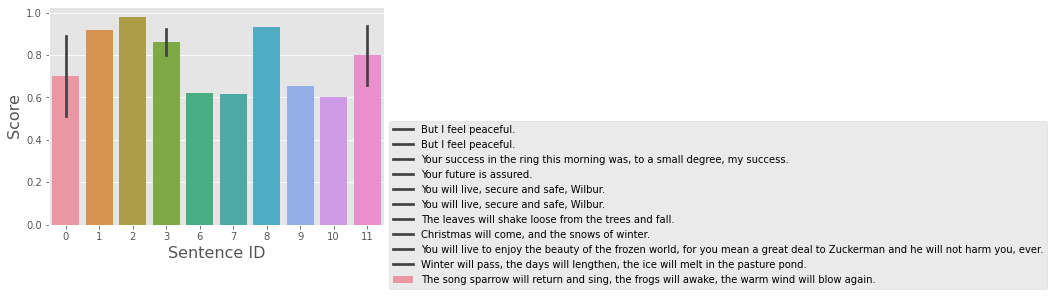

In [98]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# what do the analytical scores look like in a bar chart?
plt.style.use('ggplot')
labels2 = final_df2['sentence_id']
labels_legend2 = final_df2['text']
chart2 = sns.barplot(x=labels2, y=final_df2.score)
chart2.set_xlabel('Sentence ID', size=16)
chart2.set_ylabel('Score', size=16)
chart2.legend(labels_legend2, loc='best', bbox_to_anchor=(1.0, 0., 0.5, 0.5))

plt.show()